# 【問題1】コンペティション内容の把握
>Home Credit Default Riskはどのようなコンペティションか、以下の観点からレポートしてください。
- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

1.Home Credit は、信用履歴が不十分で銀行口座がなくお金が借りられない人々にお金を貸し出すサービス。
そういった人々が良好なローンを組むことを保証するために、Home Credit は様々なデータ(電話会社、取引情報を含む)を用い、顧客の返済(repayment)能力を予測します。

2.返済可能なクライアントが拒否されないように、
- 顧客の返済能力の予測を行う。元金(principal)、満期(maturity)、返済(repayment)カレンダーを予測。

3.予測することで企業が得られるメリットは、
- デフォルト(債務不履行)を減らせる。
- 返済能力があるにも関わらずこれまで融資を受けられなかった顧客を取り込める。

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

df = pd.read_csv('application_train.csv')

In [2]:
print(df.shape)

(307511, 122)


## 【問題2】データの概観の把握

In [3]:
# .head()、.info()、describe()などを使う
display(df.head(10))
# print(df.info())
# print(df.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#欠損値の有無を見る
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline
for i in df.columns:
    print(i, df[i].isnull().sum(), sep = ":")

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE:0
CODE_GENDER:0
FLAG_OWN_CAR:0
FLAG_OWN_REALTY:0
CNT_CHILDREN:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE:1292
NAME_INCOME_TYPE:0
NAME_EDUCATION_TYPE:0
NAME_FAMILY_STATUS:0
NAME_HOUSING_TYPE:0
REGION_POPULATION_RELATIVE:0
DAYS_BIRTH:0
DAYS_EMPLOYED:0
DAYS_REGISTRATION:0
DAYS_ID_PUBLISH:0
OWN_CAR_AGE:202929
FLAG_MOBIL:0
FLAG_EMP_PHONE:0
FLAG_WORK_PHONE:0
FLAG_CONT_MOBILE:0
FLAG_PHONE:0
FLAG_EMAIL:0
OCCUPATION_TYPE:96391
CNT_FAM_MEMBERS:2
REGION_RATING_CLIENT:0
REGION_RATING_CLIENT_W_CITY:0
WEEKDAY_APPR_PROCESS_START:0
HOUR_APPR_PROCESS_START:0
REG_REGION_NOT_LIVE_REGION:0
REG_REGION_NOT_WORK_REGION:0
LIVE_REGION_NOT_WORK_REGION:0
REG_CITY_NOT_LIVE_CITY:0
REG_CITY_NOT_WORK_CITY:0
LIVE_CITY_NOT_WORK_CITY:0
ORGANIZATION_TYPE:0
EXT_SOURCE_1:173378
EXT_SOURCE_2:660
EXT_SOURCE_3:60965
APARTMENTS_AVG:156061
BASEMENTAREA_AVG:179943
YEARS_BEGINEXPLUATATION_AVG:150007
YEARS_BUILD_AVG:204488
COMMONAREA_AVG:214865
ELE

In [5]:
df["EXT_SOURCE_1"]

0         0.083037
1         0.311267
2              NaN
3              NaN
4              NaN
            ...   
307506    0.145570
307507         NaN
307508    0.744026
307509         NaN
307510    0.734460
Name: EXT_SOURCE_1, Length: 307511, dtype: float64

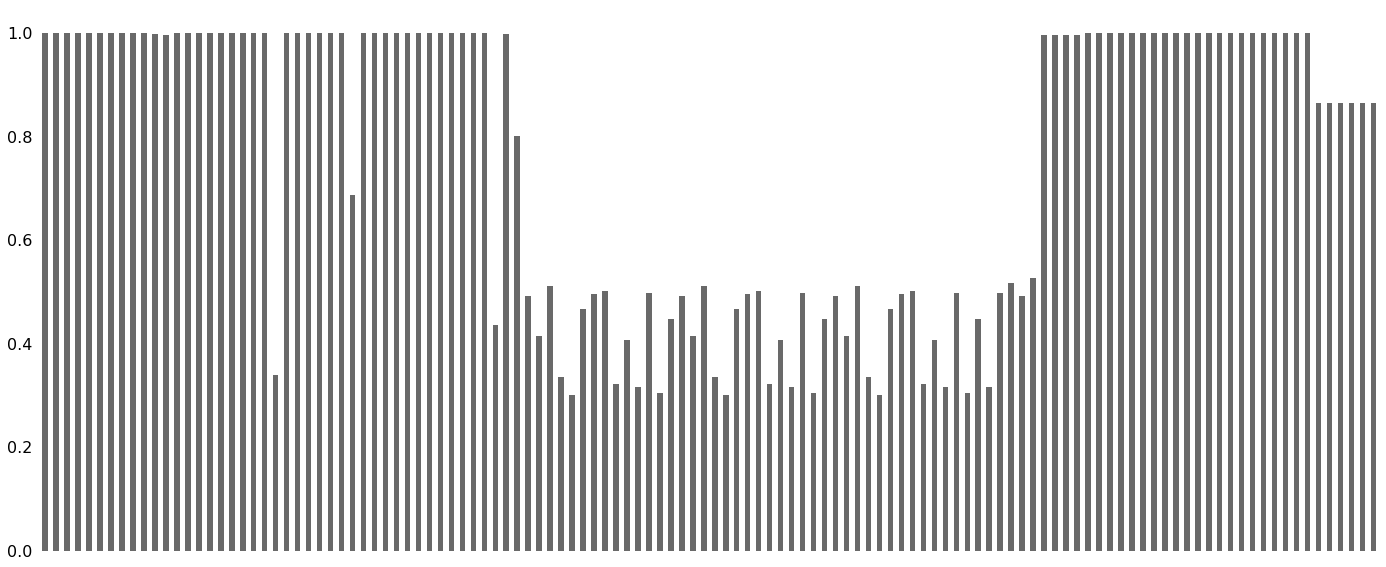

In [7]:
msno.bar(df)

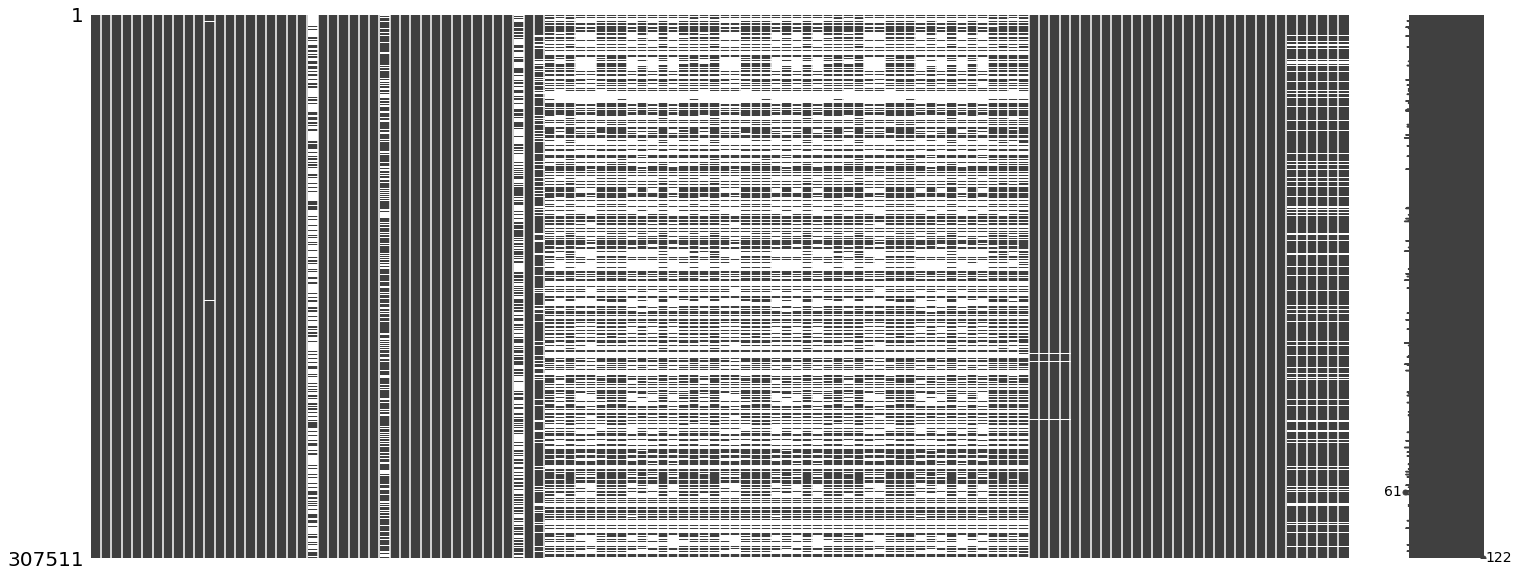

In [8]:
msno.matrix(df)

## 【問題3】課題設定
>データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

In [11]:
#相関を見る、欠損値の処理方法を考える

## 【問題4】データ探索
>考察を伴う表やグラフを 15個以上 作成してください。
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [7]:
#エンコードしたい列を指定　# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

list_cols[0] # 'NAME_CONTRACT_TYPE'

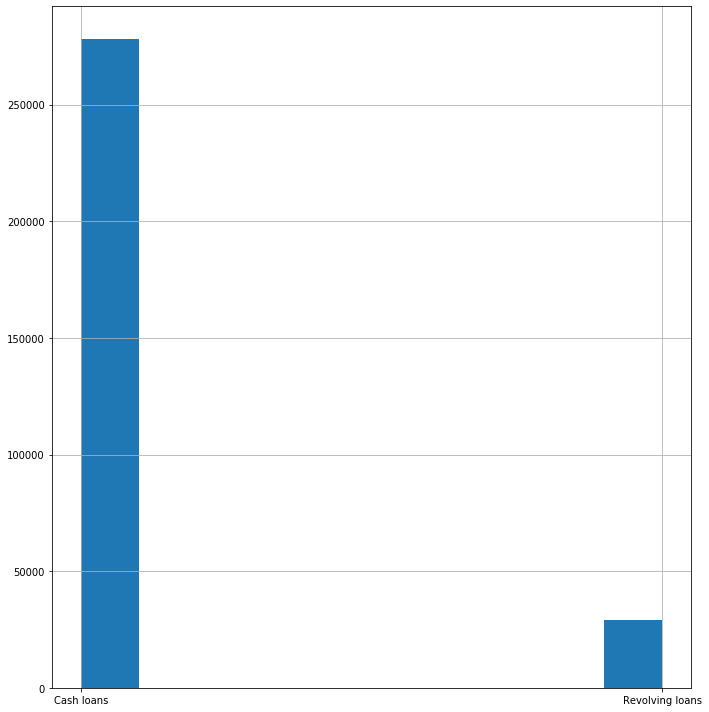

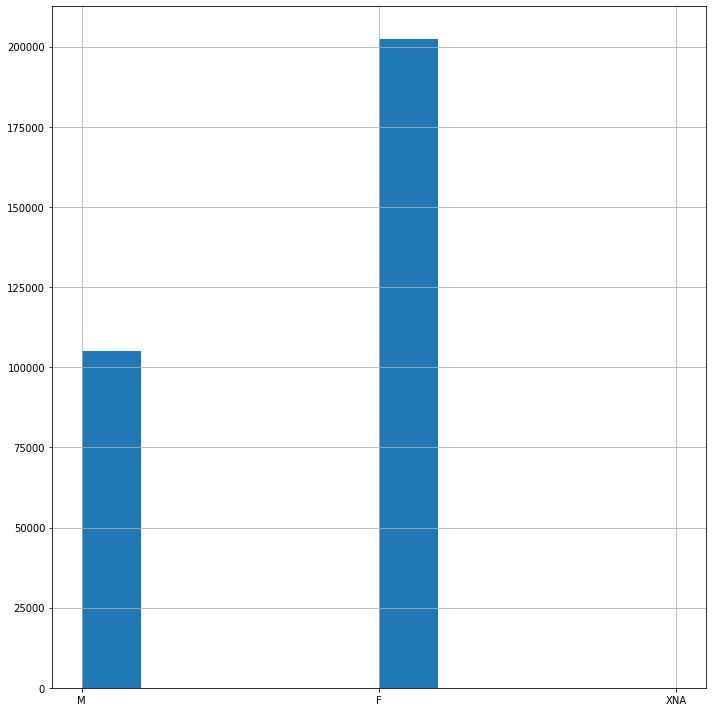

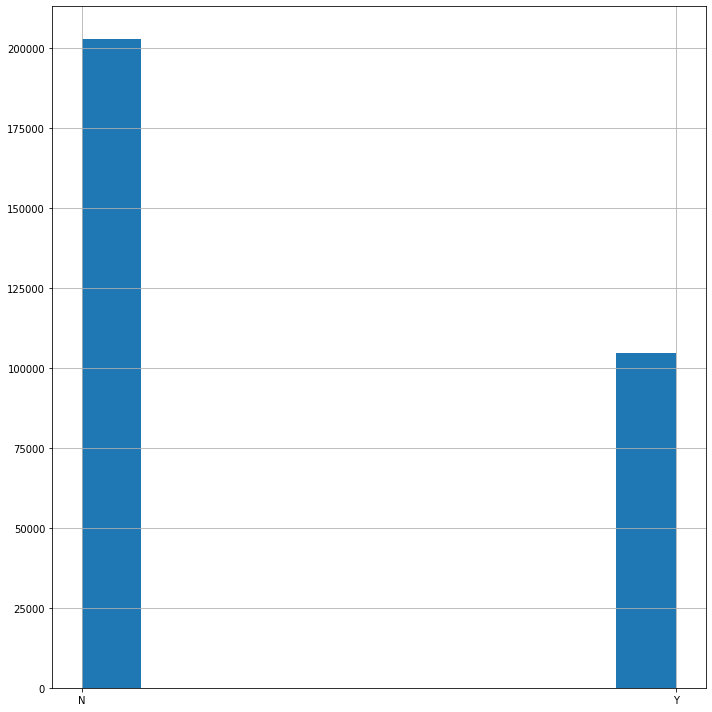

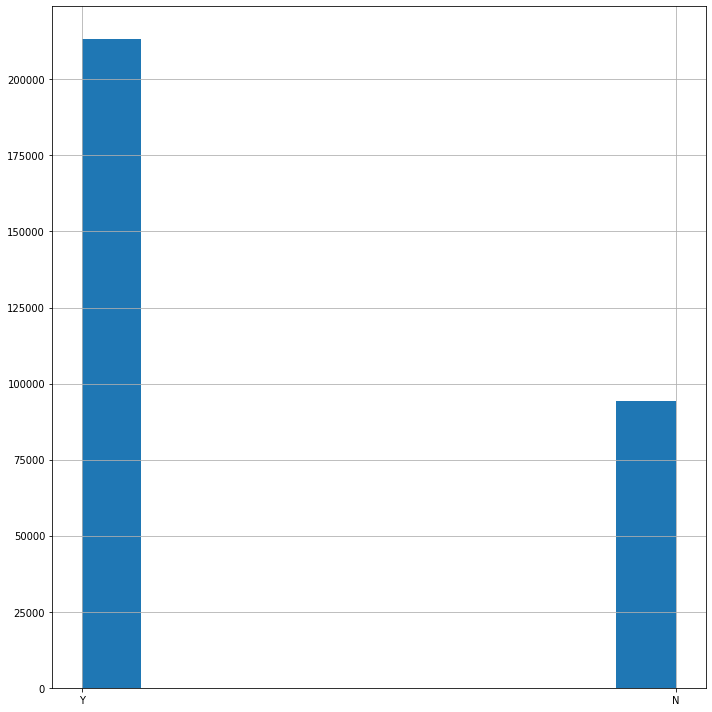

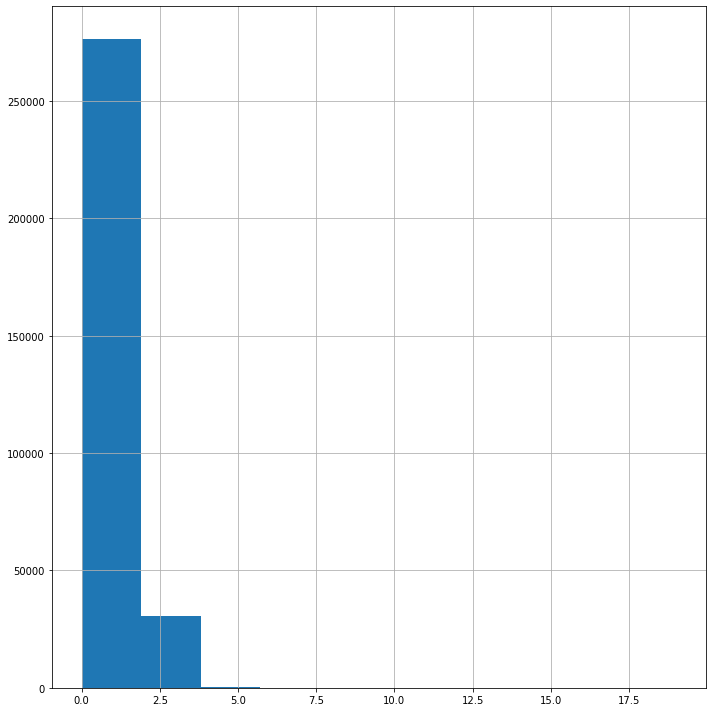

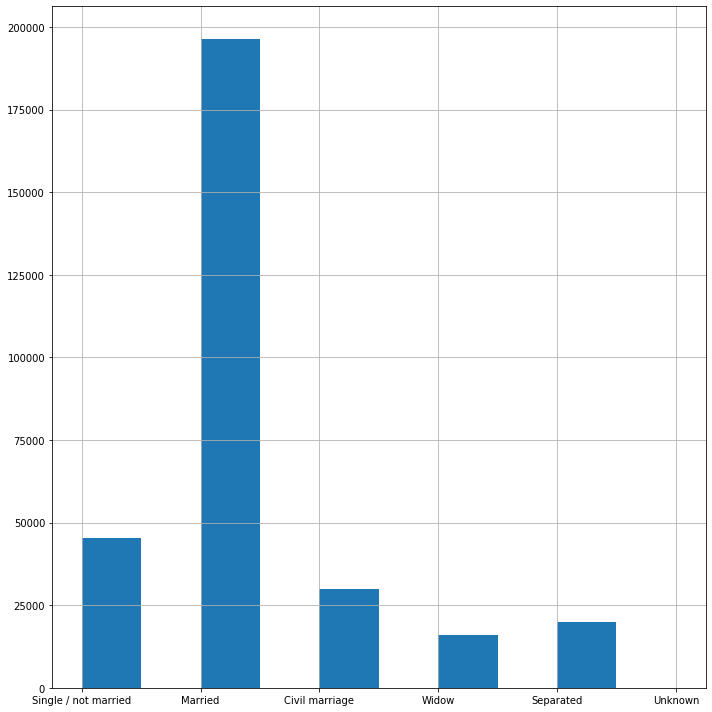

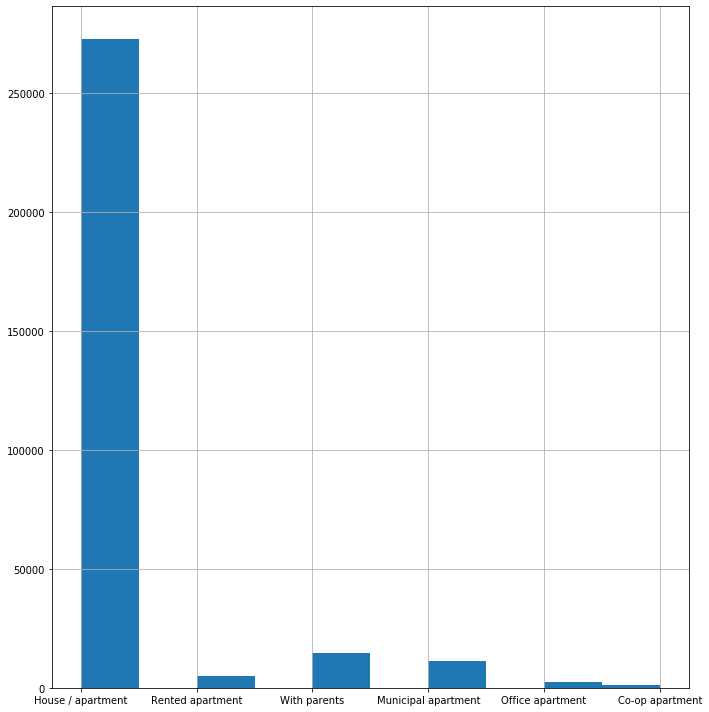

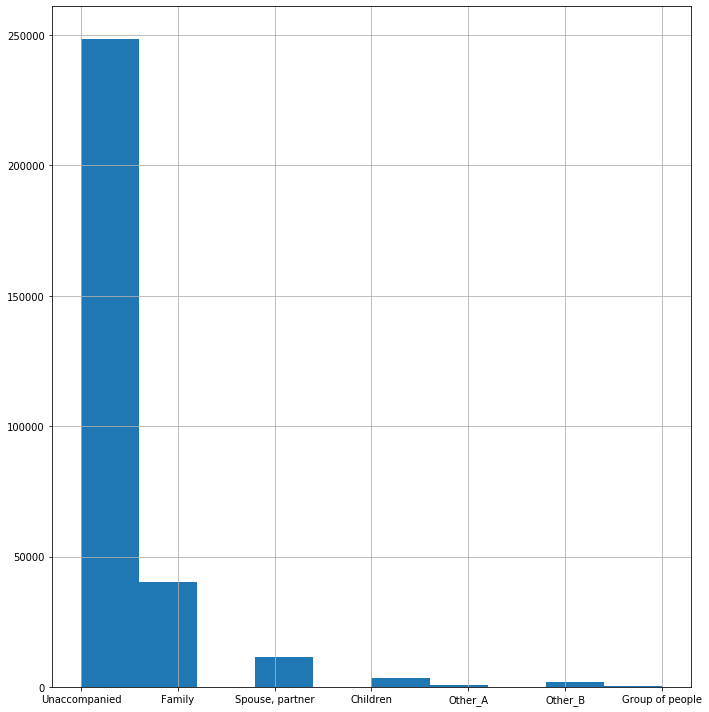

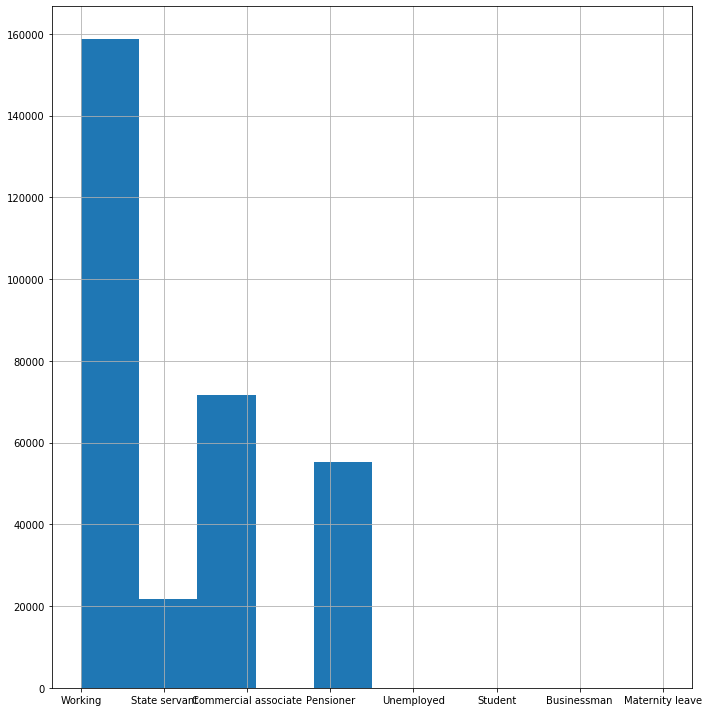

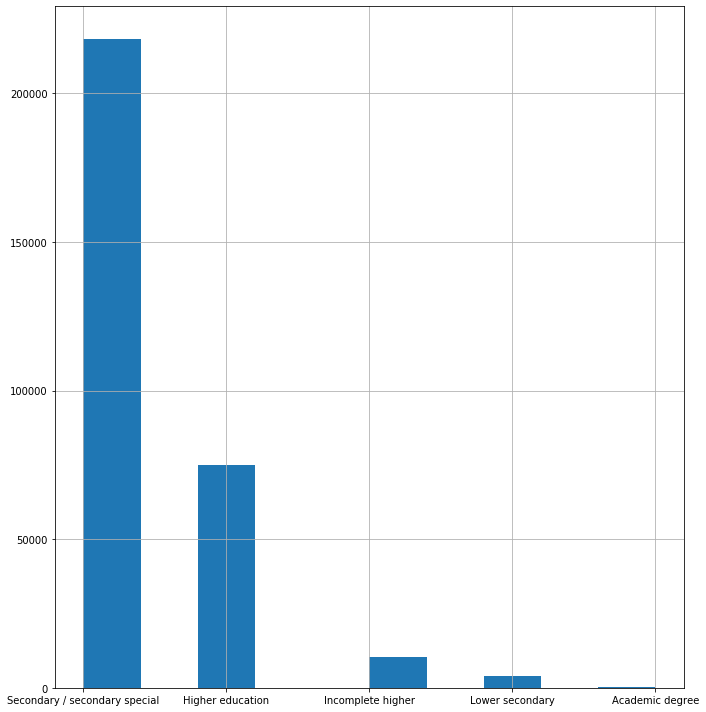

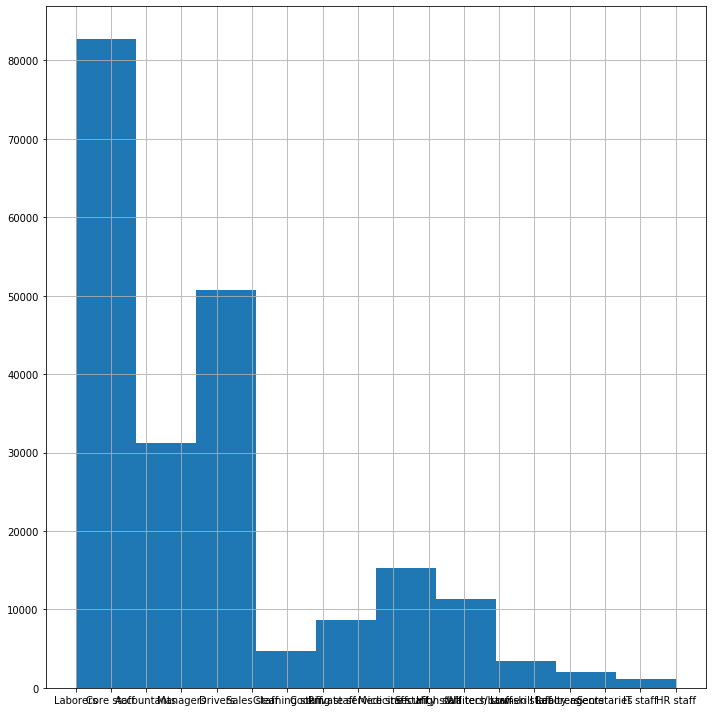

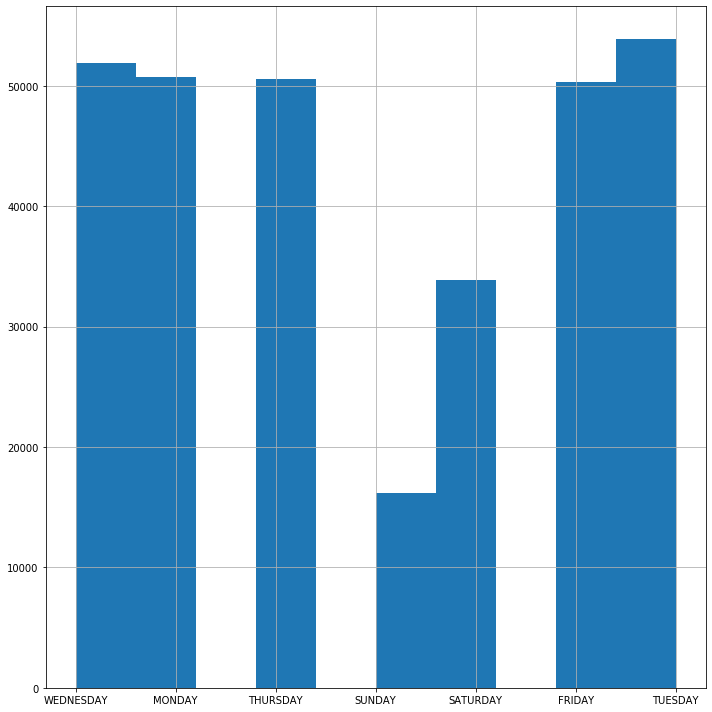

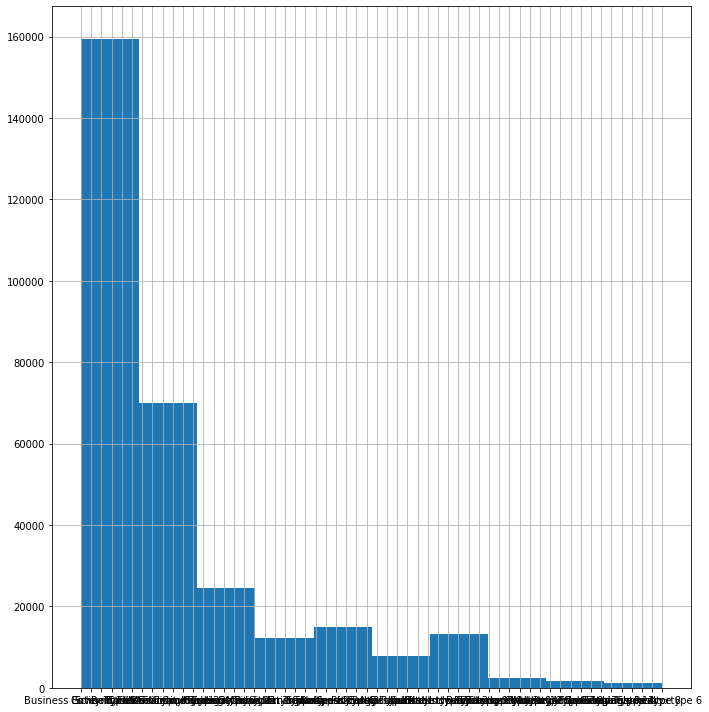

In [ ]:
df[list_cols[0]]
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
for i in range(15):
    df[list_cols[i]].hist()
    plt.tight_layout()
    plt.show()

In [ ]:
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')

# pd.DataFrameをそのまま突っ込む
df_gender_onehot = ce_ohe.fit_transform(df)

In [40]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [42]:
df.value_counts()

#箱ひげ、バイオリン、ペアプロット、ジョインプロット,hist


AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [28]:
def plotting_data(feature, color):
    plt.figure(figsize = (10.6))
    sns.distplot(ce_ohe[feature].dropna(), color = color,
                 kde = True, bins = 100)
    plt.show()

In [41]:
df['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [29]:
plotting_data('AMT_INCOME_TOTAL', 'blue')

TypeError: from_bounds() argument after * must be an iterable, not float

<BarContainer object of 2 artists>

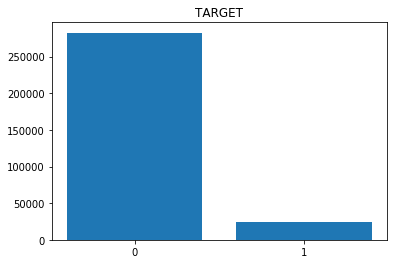

In [9]:
#クラスごとのデータ数をグラフに出す

a = len(df[df["TARGET"]==0])
b = len(df[df["TARGET"]==1])
x = [0,1]
y = [a,b]
plt.title("TARGET")
plt.bar(x, y, tick_label = x)

In [10]:
#TARGET value 0 means loan is repayed, value 1 means loan is not repayed.
print(a/b) 
#偏りが多いので、データに重みをつける？

11.387150050352467


In [12]:
# 相関を見る
df2 = df
list_str=[]
for i in df.columns:
    if df2[i].dtypes == 'O':
        df2 = df2.drop([i], axis = 1)
        list_str.append(i)
        
df2.info

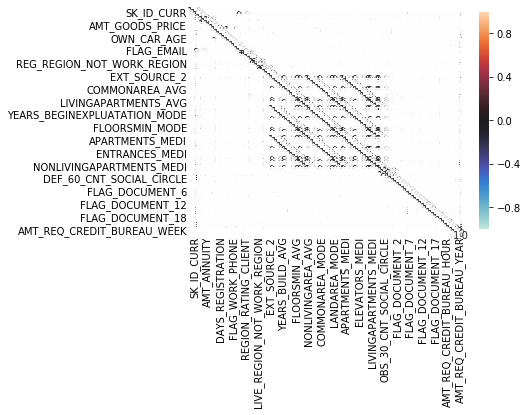

In [17]:
corr_mat = df2.corr(method = 'pearson')
sns.heatmap(corr_mat,vmin = -1.0,
            vmax=1.0,center=0,annot = True,
           fmt='.1f')
plt.show()

In [21]:
from scipy.stats import pearsonr

list_i = []
for i in df2.columns:
    a, b = pearsonr(df2[i],df2["TARGET"])
    print("{},{}".format(i,a)) #　　if 0.3 < a でも相関見られず。
    
#str型、欠損値ありデータを省くとTARGETと相関の高い変数はない。

SK_ID_CURR,-0.0021084690181977193
TARGET,0.9999999999999439
CNT_CHILDREN,0.01918713359627055
AMT_INCOME_TOTAL,-0.003981865601205687
AMT_CREDIT,-0.030369286461429734


ValueError: array must not contain infs or NaNs

In [112]:
#str型をダミー変数化して使う or 欠損値処理
# 真ん中の凹みを家あるかないかにしてみる

In [20]:
#欠損値処理
for i in df.columns:
    print(i, df[i].isnull().sum(), sep = ":")
#欠損がランダムではない可能性、、、

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE:0
CODE_GENDER:0
FLAG_OWN_CAR:0
FLAG_OWN_REALTY:0
CNT_CHILDREN:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE:1292
NAME_INCOME_TYPE:0
NAME_EDUCATION_TYPE:0
NAME_FAMILY_STATUS:0
NAME_HOUSING_TYPE:0
REGION_POPULATION_RELATIVE:0
DAYS_BIRTH:0
DAYS_EMPLOYED:0
DAYS_REGISTRATION:0
DAYS_ID_PUBLISH:0
OWN_CAR_AGE:202929
FLAG_MOBIL:0
FLAG_EMP_PHONE:0
FLAG_WORK_PHONE:0
FLAG_CONT_MOBILE:0
FLAG_PHONE:0
FLAG_EMAIL:0
OCCUPATION_TYPE:96391
CNT_FAM_MEMBERS:2
REGION_RATING_CLIENT:0
REGION_RATING_CLIENT_W_CITY:0
WEEKDAY_APPR_PROCESS_START:0
HOUR_APPR_PROCESS_START:0
REG_REGION_NOT_LIVE_REGION:0
REG_REGION_NOT_WORK_REGION:0
LIVE_REGION_NOT_WORK_REGION:0
REG_CITY_NOT_LIVE_CITY:0
REG_CITY_NOT_WORK_CITY:0
LIVE_CITY_NOT_WORK_CITY:0
ORGANIZATION_TYPE:0
EXT_SOURCE_1:173378
EXT_SOURCE_2:660
EXT_SOURCE_3:60965
APARTMENTS_AVG:156061
BASEMENTAREA_AVG:179943
YEARS_BEGINEXPLUATATION_AVG:150007
YEARS_BUILD_AVG:204488
COMMONAREA_AVG:214865
ELE

In [18]:
#ダミー変数化
df_str = df[list_str]
df_dummy = pd.get_dummies(df_str)
# print(df_dummy)

In [23]:
#repace で　df２の欠損値　null = 0 にしてみる。０が圧倒的に多いから。

df_dummy = df_dummy.replace(np.nan,0)
df_mix = pd.concat([df2, df_dummy], axis=1)
df_mix = df_mix.replace(np.nan,0)

# print(df_mix)

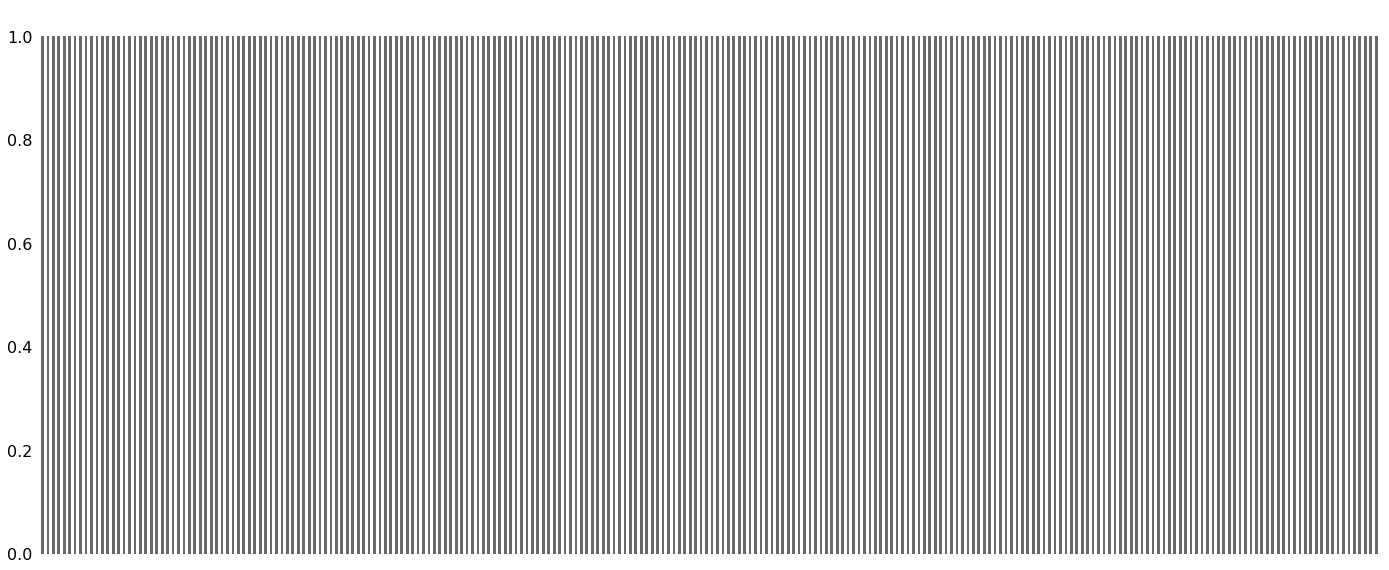

In [135]:
msno.bar(df_mix)

In [151]:
#再度相関を求める
list_mix=[]

for i in df_mix.columns:
    a, b = pearsonr(df_mix[i],df_mix["TARGET"])

    print("{},{}".format(i,a)) #　　if 0.2 < abs(a) でも相関見られず。

SK_ID_CURR,-0.0021084690181977193
TARGET,1.0
CNT_CHILDREN,0.019187133596270035
AMT_INCOME_TOTAL,-0.00398186560120566
AMT_CREDIT,-0.030369286461429734
AMT_ANNUITY,-0.012794036703988614
AMT_GOODS_PRICE,-0.03956533747621201
REGION_POPULATION_RELATIVE,-0.03722714854244523
DAYS_BIRTH,0.07823930830982699
DAYS_EMPLOYED,-0.04493166265773869
DAYS_REGISTRATION,0.04197486283141716
DAYS_ID_PUBLISH,0.05145717260705746
OWN_CAR_AGE,0.002285352065967182
FLAG_MOBIL,0.0005343955790282185
FLAG_EMP_PHONE,0.04598221971659249
FLAG_WORK_PHONE,0.028524322363217402
FLAG_CONT_MOBILE,0.0003701268023489211
FLAG_PHONE,-0.023806272330357387
FLAG_EMAIL,-0.0017583834312544897
CNT_FAM_MEMBERS,0.009312168432937314
REGION_RATING_CLIENT,0.058899014945712556
REGION_RATING_CLIENT_W_CITY,0.06089266756482353
HOUR_APPR_PROCESS_START,-0.024165831430094372
REG_REGION_NOT_LIVE_REGION,0.00557594452090841
REG_REGION_NOT_WORK_REGION,0.006941907545371849
LIVE_REGION_NOT_WORK_REGION,0.0028194791841591764
REG_CITY_NOT_LIVE_CITY,0.0443

In [134]:
for i in df_mix.columns:
    print(i, df_mix[i].isnull().sum(), sep = ":")


SK_ID_CURR:0
TARGET:0
CNT_CHILDREN:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:0
AMT_GOODS_PRICE:0
REGION_POPULATION_RELATIVE:0
DAYS_BIRTH:0
DAYS_EMPLOYED:0
DAYS_REGISTRATION:0
DAYS_ID_PUBLISH:0
OWN_CAR_AGE:0
FLAG_MOBIL:0
FLAG_EMP_PHONE:0
FLAG_WORK_PHONE:0
FLAG_CONT_MOBILE:0
FLAG_PHONE:0
FLAG_EMAIL:0
CNT_FAM_MEMBERS:0
REGION_RATING_CLIENT:0
REGION_RATING_CLIENT_W_CITY:0
HOUR_APPR_PROCESS_START:0
REG_REGION_NOT_LIVE_REGION:0
REG_REGION_NOT_WORK_REGION:0
LIVE_REGION_NOT_WORK_REGION:0
REG_CITY_NOT_LIVE_CITY:0
REG_CITY_NOT_WORK_CITY:0
LIVE_CITY_NOT_WORK_CITY:0
EXT_SOURCE_1:0
EXT_SOURCE_2:0
EXT_SOURCE_3:0
APARTMENTS_AVG:0
BASEMENTAREA_AVG:0
YEARS_BEGINEXPLUATATION_AVG:0
YEARS_BUILD_AVG:0
COMMONAREA_AVG:0
ELEVATORS_AVG:0
ENTRANCES_AVG:0
FLOORSMAX_AVG:0
FLOORSMIN_AVG:0
LANDAREA_AVG:0
LIVINGAPARTMENTS_AVG:0
LIVINGAREA_AVG:0
NONLIVINGAPARTMENTS_AVG:0
NONLIVINGAREA_AVG:0
APARTMENTS_MODE:0
BASEMENTAREA_MODE:0
YEARS_BEGINEXPLUATATION_MODE:0
YEARS_BUILD_MODE:0
COMMONAREA_MODE:0
ELEVATORS_MODE:0
E

In [136]:
#置き換えても相関は見られない。

In [145]:
#決定木
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_mix.drop(["TARGET"],axis = 1)
y = df_mix["TARGET"]

(train_X, test_X, train_y, test_y) = train_test_split(X,y, test_size=0.3, random_state = 0)

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [146]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8534697682485313

In [150]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [50]:
#名義尺度を変数化
import category_encoders as ce
#エンコードしたい列を指定　# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')

# pd.DataFrameをそのまま突っ込む
df_gender_onehot = ce_ohe.fit_transform(df)

#display(df_gender_onehot)
for i in df_gender_onehot.columns:
    print(i, df_gender_onehot[i].isnull().sum(), sep = ":")

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE_1:0
NAME_CONTRACT_TYPE_2:0
CODE_GENDER_1:0
CODE_GENDER_2:0
CODE_GENDER_3:0
FLAG_OWN_CAR_1:0
FLAG_OWN_CAR_2:0
FLAG_OWN_REALTY_1:0
FLAG_OWN_REALTY_2:0
CNT_CHILDREN_1:0
CNT_CHILDREN_2:0
CNT_CHILDREN_3:0
CNT_CHILDREN_4:0
CNT_CHILDREN_5:0
CNT_CHILDREN_6:0
CNT_CHILDREN_7:0
CNT_CHILDREN_8:0
CNT_CHILDREN_9:0
CNT_CHILDREN_10:0
CNT_CHILDREN_11:0
CNT_CHILDREN_12:0
CNT_CHILDREN_13:0
CNT_CHILDREN_14:0
CNT_CHILDREN_15:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE_1:0
NAME_TYPE_SUITE_2:0
NAME_TYPE_SUITE_3:0
NAME_TYPE_SUITE_4:0
NAME_TYPE_SUITE_5:0
NAME_TYPE_SUITE_6:0
NAME_TYPE_SUITE_7:0
NAME_TYPE_SUITE_8:0
NAME_INCOME_TYPE_1:0
NAME_INCOME_TYPE_2:0
NAME_INCOME_TYPE_3:0
NAME_INCOME_TYPE_4:0
NAME_INCOME_TYPE_5:0
NAME_INCOME_TYPE_6:0
NAME_INCOME_TYPE_7:0
NAME_INCOME_TYPE_8:0
NAME_EDUCATION_TYPE_1:0
NAME_EDUCATION_TYPE_2:0
NAME_EDUCATION_TYPE_3:0
NAME_EDUCATION_TYPE_4:0
NAME_EDUCATION_TYPE_5:0
NAME_FAMILY_STATUS_1:0
NAME_FAMILY

In [51]:
#TARGET の分離
X_df = df_gender_onehot.drop("TARGET", axis = 1)
y_df = pd.DataFrame(df_gender_onehot.loc[:,'TARGET'])

In [48]:
pip install minepy

    100% |████████████████████████████████| 501kB 19.0MB/s ta 0:00:01
  Stored in directory: /Users/akishimasaki/Library/Caches/pip/wheels/ea/ad/3a/0e6f5c87be5ee6ad987bd7a317dd6b92e616d559f63f4d8acc
Successfully built minepy
Note: you may need to restart the kernel to use updated packages.


In [53]:
c = df_gender_onehot.corr().abs()

s = c.unstack()
so = s.order(kind="quicksort")

print so[-122:-112]

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [55]:
df.shape

(307511, 122)